## Applied Stochastic processes - Assignment 2

Andrea Lisci

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import seaborn as sns
import random 
from scipy.sparse import csr_matrix

### 1.  Does $X_t$ meet the assumption of the Convergence Theorem?

In [2]:
P = np.array([[0,1/3,1/3,1/3,0],[0,0,0,1,0],[1,0,0,0,0],[0,0,1/2,0,1/2],[0,0,0,1,0]])
P

array([[0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        , 0.        ]])

### 2.1. Invariant distribution method

In [4]:
values, left = scipy.linalg.eig(P, right = False, left = True)

for i in range(len(values)):
    print("Left eigenvector for eigenvalue {}:".format(values[i]))
    print(left[:,i])
    print()

Left eigenvector for eigenvalue (-0.7886751345948122+0j):
[-0.66402333  0.28064928  0.52369869 -0.38337405  0.24304941]

Left eigenvector for eigenvalue (-0.21132486540518686+0j):
[ 0.41768125 -0.65882964 -0.08826643 -0.24114838  0.5705632 ]

Left eigenvector for eigenvalue (-2.532087947124666e-16+0j):
[ 5.37136967e-16 -7.07106781e-01 -7.83235987e-32 -3.58091312e-16
  7.07106781e-01]

Left eigenvector for eigenvalue (1.0000000000000009+0j):
[0.48038446 0.16012815 0.48038446 0.64051262 0.32025631]

Left eigenvector for eigenvalue 0j:
[ 0.         -0.70710678  0.          0.          0.70710678]



#### The normalized probabilities are:

In [5]:
for i in range(len(values)):
    if (values[i] < 1.001) & (values[i] > 0.999):
        print(left[:,i]/sum(left[:,i]))

[0.23076923 0.07692308 0.23076923 0.30769231 0.15384615]


In [6]:
x = [0.23076923, 0.07692308, 0.23076923, 0.30769231 ,0.15384615]
sum(x)

0.9999999999999999

### 2.2. Limiting distribution method

In [7]:
x_0 = [1,0,0,0,0]
x_1 = x_0
i = 0
while i < 1000000:
    x_1 =np.matmul(x_1,P)
    i = i+1

In [8]:
x_1

array([0.23076923, 0.07692308, 0.23076923, 0.30769231, 0.15384615])

In [9]:
x_0 = [0,0,0,0,1]
x_1 = x_0
i = 0
while i < 1000000:
    x_1 =np.matmul(x_1,P)
    i = i+1

In [10]:
x_1

array([0.23076923, 0.07692308, 0.23076923, 0.30769231, 0.15384615])

### 2.3. Asymptotic distribution method

In [11]:
chi = [1,2,3,4,5]
X_t = []
X_t.append(1)
for N in range(1,10000):
    prob = P[X_t[N-1]-1,:].tolist()
    x_t = random.choices(chi,weights = prob,k=1)
    X_t.append(x_t[0])

In [12]:
prob_fin = []
for i in chi:
    x_i = X_t.count(i)/len(X_t)
    prob_fin.append(x_i)
prob_fin

[0.226, 0.0753, 0.226, 0.3127, 0.16]

In [14]:
cumu1 = []
cumu2 = []
cumu3 = []
cumu4 = []
cumu5 = []
for i in X_t:
    if i == 1:
        cumu1.append(1)
    else:
        cumu1.append(0)
    if i == 2:
        cumu2.append(1)
    else:
        cumu2.append(0)
    if i == 3:
        cumu3.append(1)
    else:
        cumu3.append(0)
    if i == 4:
        cumu4.append(1)
    else:
        cumu4.append(0)
    if i == 5:
        cumu5.append(1)
    else:
        cumu5.append(0)

Text(0, 0.5, 'Frequency')

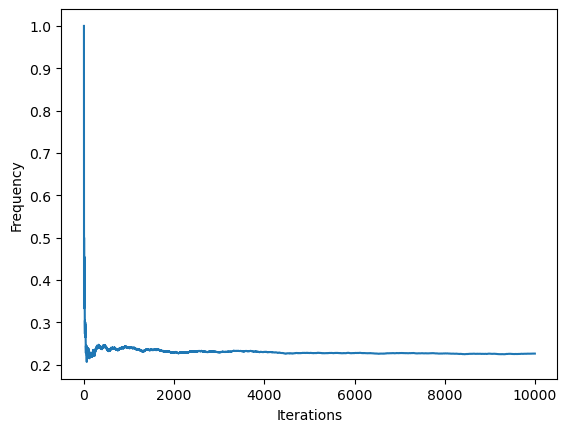

In [20]:
plt.plot(np.cumsum(cumu1)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

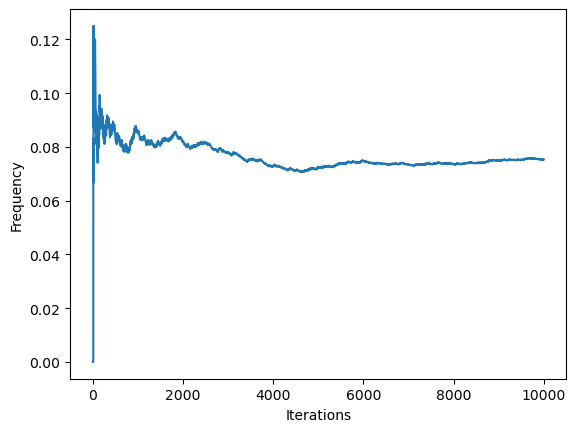

In [21]:
plt.plot(np.cumsum(cumu2)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

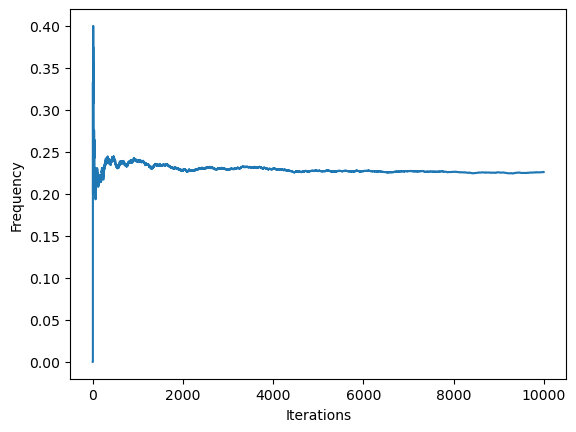

In [22]:
plt.plot(np.cumsum(cumu3)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

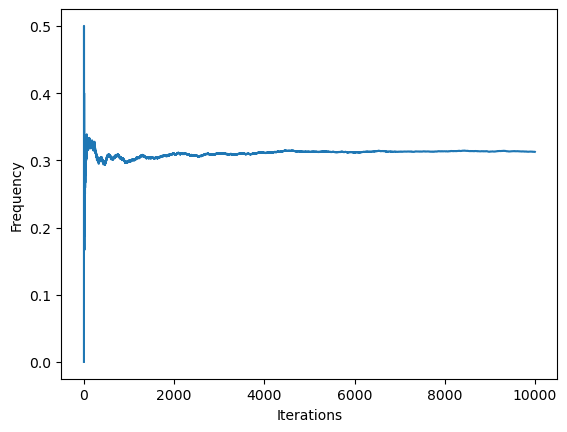

In [23]:
plt.plot(np.cumsum(cumu4)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

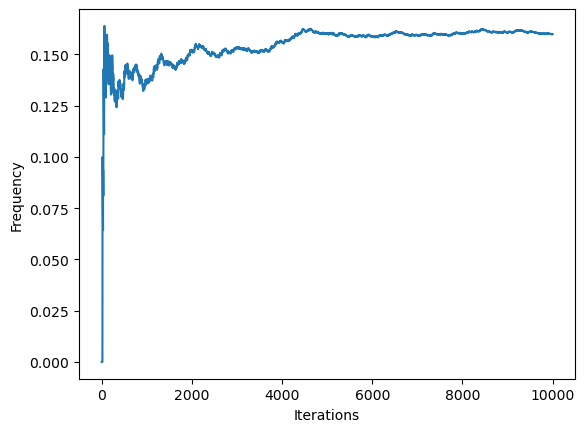

In [24]:
plt.plot(np.cumsum(cumu5)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

### 3. Ranking

In [25]:
states = list(range(1,len(chi)+1))
df2 = pd.DataFrame({'Probabilities':prob_fin}, states)
df2.head()

,Probabilities
1,0.2260
2,0.0753
3,0.2260
4,0.3127
5,0.1600


In [26]:
df2.sort_values('Probabilities', ascending = False)

,Probabilities
4,0.3127
1,0.2260
3,0.2260
5,0.1600
2,0.0753


### Part III

### 1. Obtain the PageRank transition matrix associated to the directed network described by Net

In [57]:
net = pd.read_csv('Net.csv')
net.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
net = net.drop(net.columns[0], axis = 1)
net.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
som = net.sum(axis=1)
som.head()

0    4
1    2
2    2
3    4
4    3
dtype: int64

In [60]:
i = 0
P_net = []
for i in range(0,len(som)):
    y = net.iloc[i]/som[i]
    P_net.append(y)
    i = i +1
P_net = pd.DataFrame(P_net)
P_net.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00,0.500000,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00,0.333333,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
P_net.sum(axis = 1).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

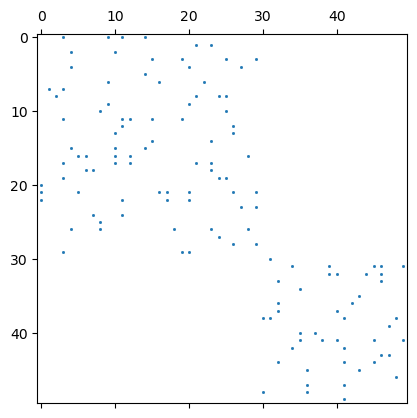

In [62]:
plt.spy(P_net, markersize = 1)

### 2. Calculate the asymptotic frequencies of first by setting $X_0=1$ and then by setting $X_0=50$

In [68]:
chi = list(range(0,len(P_net)))
X_t = []
X_t.append(0)
for N in range(1,10000):
    prob = P_net.iloc[X_t[N-1]]
    x_t = random.choices(chi,weights = prob,k=1)
    X_t.append(x_t[0])
prob = []
i = 0
for i in chi:
    prob_i = X_t.count(i)/len(X_t)
    prob.append(prob_i)
    i = i +1

Text(0, 0.5, 'Probabilities')

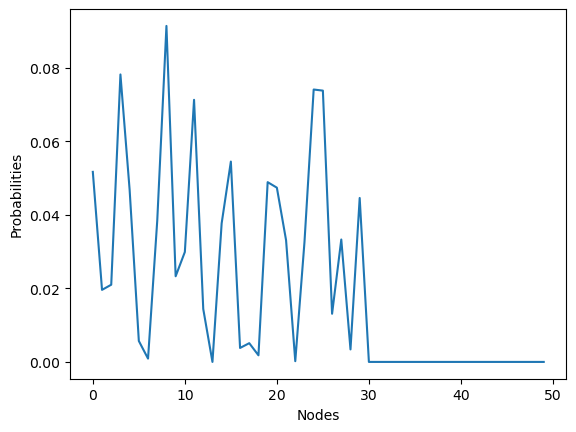

In [69]:
plt.plot(prob)
plt.xlabel('Nodes')
plt.ylabel('Probabilities')

In [70]:
chi = list(range(0,len(P_net)))
X_t = []
X_t.append(49)
for N in range(1,10000):
    prob = P_net.iloc[X_t[N-1]]
    x_t = random.choices(chi,weights = prob,k=1)
    X_t.append(x_t[0])
prob = []
i = 0
for i in chi:
    prob_i = X_t.count(i)/len(X_t)
    prob.append(prob_i)
    i = i +1

Text(0, 0.5, 'Probabilities')

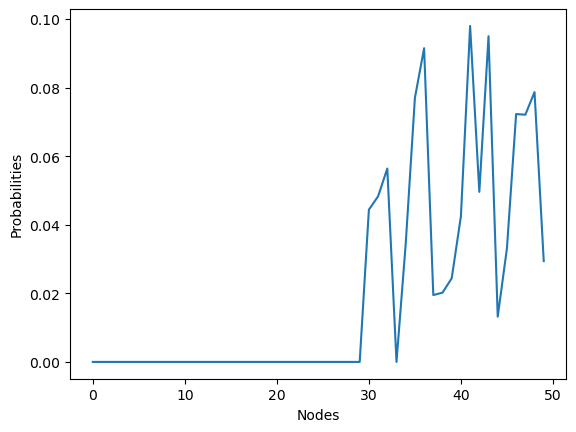

In [71]:
plt.plot(prob)
plt.xlabel('Nodes')
plt.ylabel('Probabilities')

### The two limiting probability distributions are different if we start from different nodes, so the convergence theorem does not apply.

### 3. Implement the PageRank algorithm for a suitable choice of $X_t$

In [72]:
rows, columns = P_net.shape

In [73]:
alpha = 0.95
for i in range(0,rows):
    for j in range(0,columns):
        P_net.iat[i,j] = P_net.iat[i,j]*alpha + (1-alpha)*1/rows
P_net.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.001,0.001,0.001,0.2385,0.001000,0.001,0.001,0.001,0.001,0.2385,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,0.001,0.001,0.001,0.0010,0.001000,0.001,0.001,0.001,0.001,0.0010,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,0.001,0.001,0.001,0.0010,0.476000,0.001,0.001,0.001,0.001,0.0010,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
3,0.001,0.001,0.001,0.0010,0.001000,0.001,0.001,0.001,0.001,0.0010,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,0.001,0.001,0.001,0.0010,0.317667,0.001,0.001,0.001,0.001,0.0010,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [74]:
P_net.sum(axis = 1).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [75]:
chi = list(range(0,len(P_net)))
X_t = []
X_t.append(0)
for N in range(1,10000):
    prob = P_net.iloc[X_t[N-1]]
    x_t = random.choices(chi,weights = prob,k=1)
    X_t.append(x_t[0])
prob = []
i = 0
for i in chi:
    prob_i = X_t.count(i)/len(X_t)
    prob.append(prob_i)
    i = i +1

Text(0, 0.5, 'Probabilities')

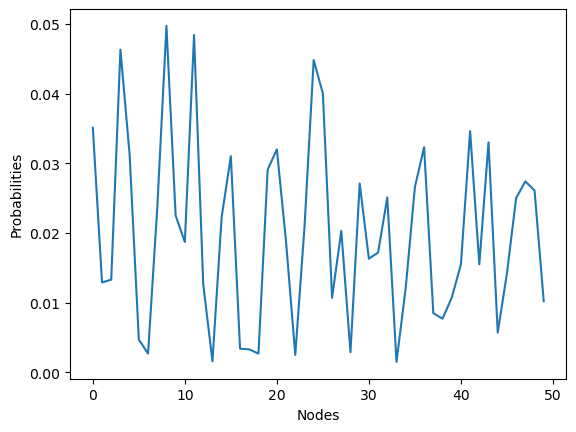

In [76]:
plt.plot(prob)
plt.xlabel('Nodes')
plt.ylabel('Probabilities')

In [77]:
chi = list(range(0,len(P_net)))
X_t = []
X_t.append(49)
for N in range(1,10000):
    prob = P_net.iloc[X_t[N-1]]
    x_t = random.choices(chi,weights = prob,k=1)
    X_t.append(x_t[0])
prob = []
i = 0
for i in chi:
    prob_i = X_t.count(i)/len(X_t)
    prob.append(prob_i)
    i = i +1

Text(0, 0.5, 'Probabilities')

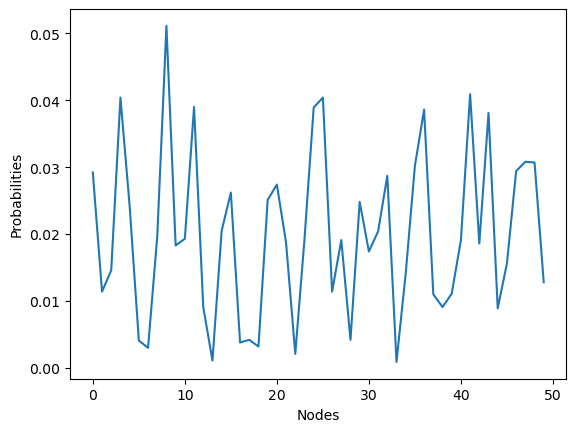

In [78]:
plt.plot(prob)
plt.xlabel('Nodes')
plt.ylabel('Probabilities')

### Ranking:

In [79]:
nodes = list(range(1,51))
df = pd.DataFrame({'Probabilities':prob}, nodes)
df.head()

,Probabilities
1,0.0292
2,0.0114
3,0.0146
4,0.0404
5,0.0242


In [81]:
df.sort_values('Probabilities', ascending = False).head()

,Probabilities
9,0.0511
42,0.0409
26,0.0404
4,0.0404
12,0.0390


### 4. At least for a few states inspect empirically whether the estimated asymptotic probabilities have converged.

In [82]:
chi = nodes
P_net.to_numpy()
X_t = []
X_t.append(1)
for N in range(1,100000):
    prob = P_net.loc[X_t[N-1]-1,:].tolist()
    x_t = random.choices(chi,weights = prob,k=1)
    X_t.append(x_t[0])

In [83]:
cumu10 = []
cumu25 = []
cumu40 = []
for i in X_t:
    if i == 10:
        cumu10.append(1)
    else:
        cumu10.append(0)
    if i == 25:
        cumu25.append(1)
    else:
        cumu25.append(0)
    if i == 40:
        cumu40.append(1)
    else:
        cumu40.append(0)

Text(0, 0.5, 'Frequency')

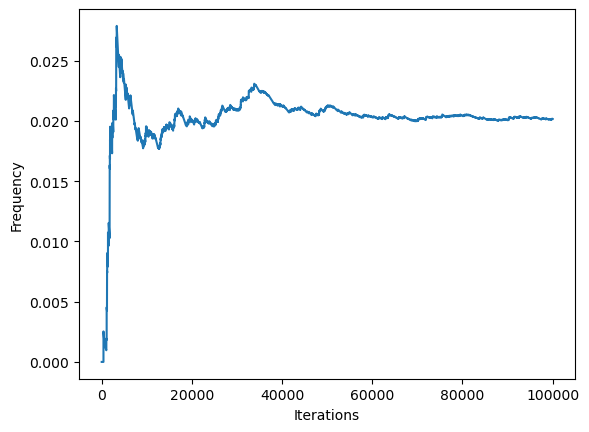

In [84]:
plt.plot(np.cumsum(cumu10)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

In [85]:
(np.cumsum(cumu10)/range(1,len(X_t)+1)).mean()

0.020234958190803894

Text(0, 0.5, 'Frequency')

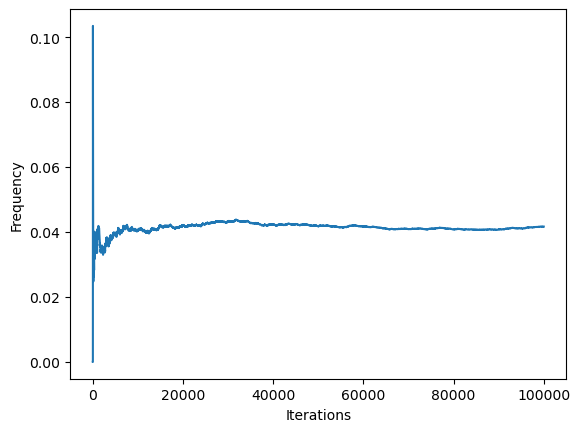

In [86]:
plt.plot(np.cumsum(cumu25)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

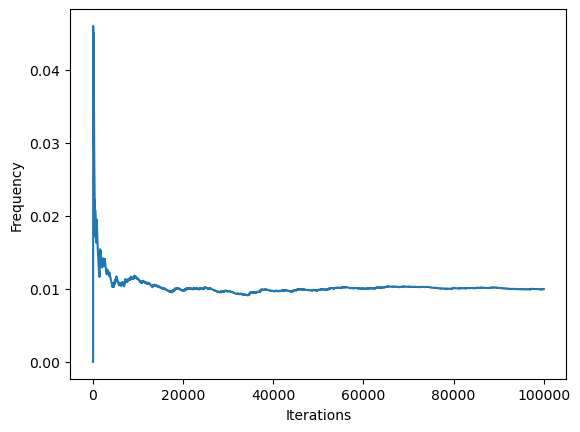

In [87]:
plt.plot(np.cumsum(cumu40)/range(1,len(X_t)+1))
plt.xlabel('Iterations')
plt.ylabel('Frequency')